<div class="alert" style="
    background: linear-gradient(135deg, #ff416c 0%, #ff4b2b 100%);
    color: #fff;
    font-weight: bold;
    padding: 12px;
    border-radius: 10px;
">
  üî• Structure of projects!
</div>


<div class="alert" style="
    background: linear-gradient(135deg, #00c853 0%, #b2ff59 100%);
    color: #fff;
    border: 2px solid #00c853;
    border-radius: 8px;
">
   1. import nessary libraries
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<div class="alert" style="
    background: linear-gradient(135deg, #00c853 0%, #b2ff59 100%);
    color: #fff;
    border: 2px solid #00c853;
    border-radius: 8px;
">
   2. read data 
</div>


In [2]:
df = pd.read_csv("dataset/train.csv")
pd.set_option('display.max_columns', 100) # for seeing all columns .
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [3]:
df.shape

(103904, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039


<div class="alert" style="
    background: linear-gradient(135deg, #00c853 0%, #b2ff59 100%);
    color: #fff;
    border: 2px solid #00c853;
    border-radius: 8px;
">
   3. data cleaning and EDA 
</div>


In [5]:
df = df.drop(['Unnamed: 0','id'], axis= 1)


In [6]:
df.shape

(103904, 23)

In [7]:
len(df.columns)

23

In [8]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

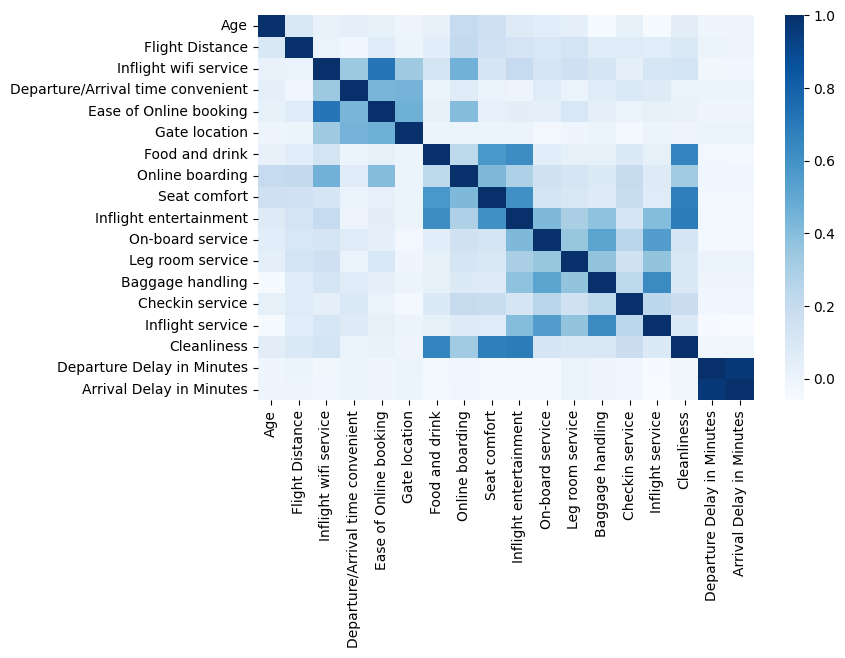

In [10]:
numeric_df = df.select_dtypes(include='number') # select only numerical columns

corr = numeric_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr , cmap="Blues")
plt.show()

In [11]:
df.describe()

Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

<div class="alert" style="
    background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
    color: #fff;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    border-radius: 8px;
">
  üåä check outliers !
</div>


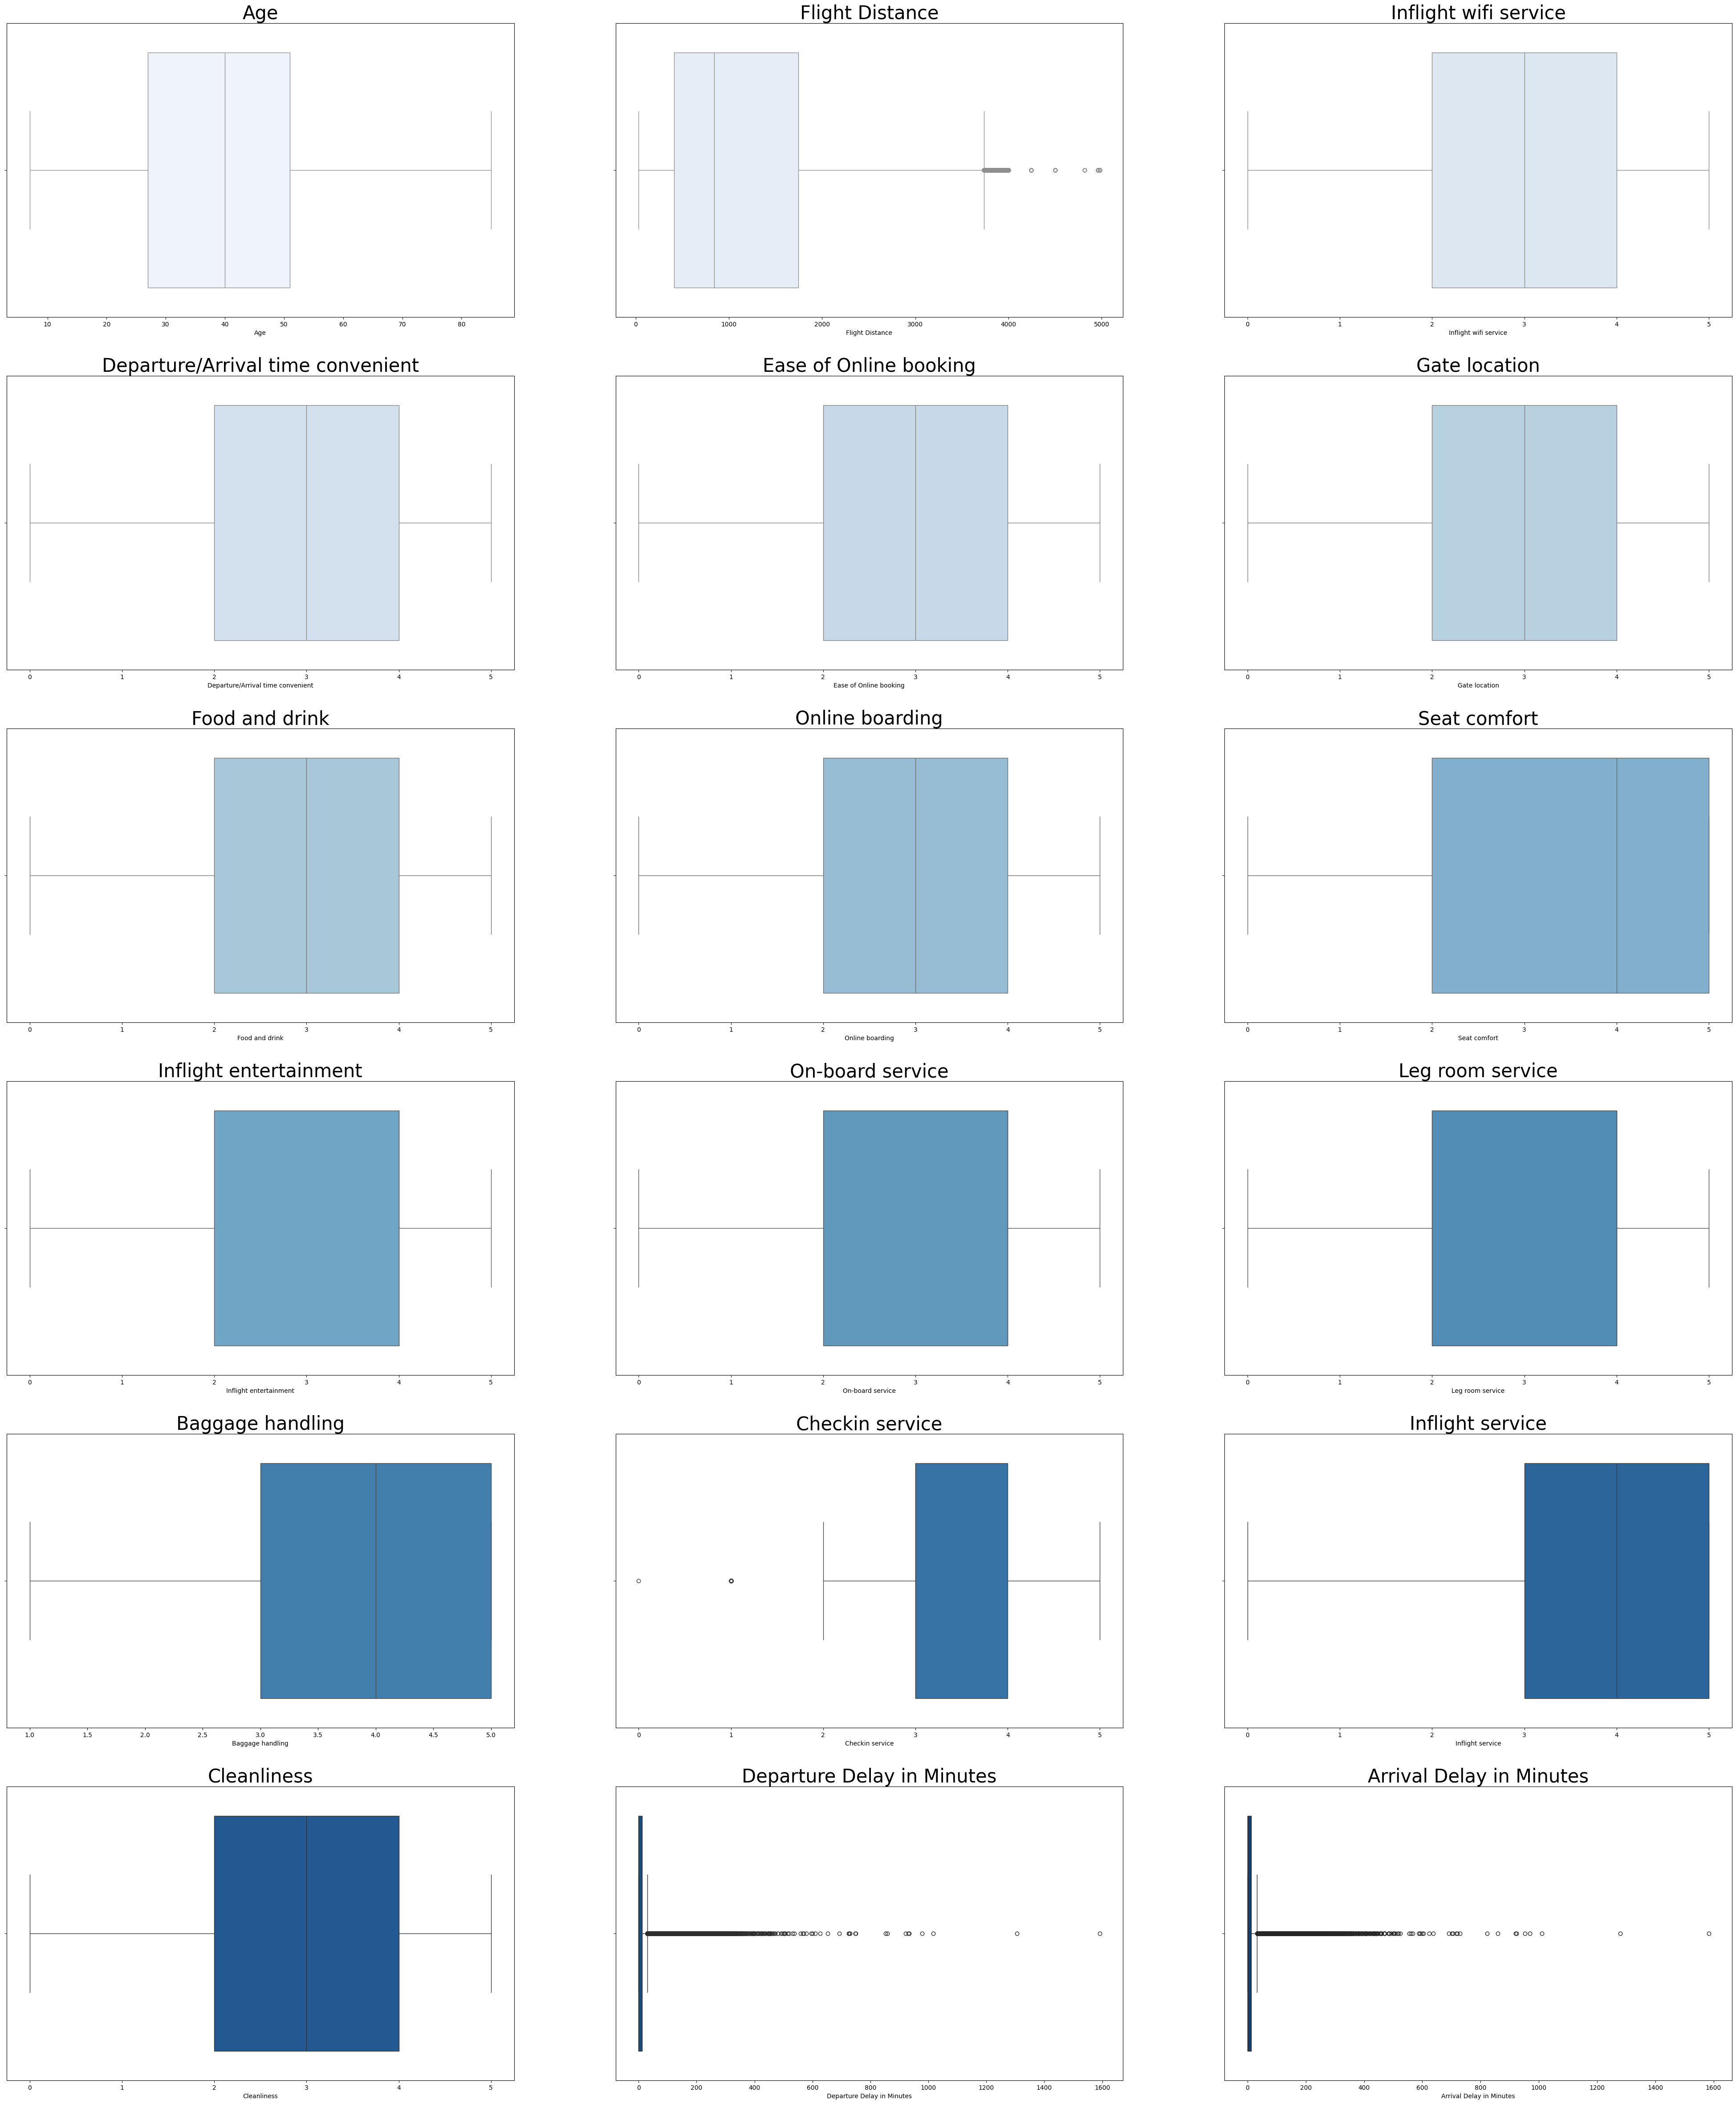

In [12]:
### Check for Outliers

numerical = df.select_dtypes(include=['int', 'float']) # select only numerical columns

blue_palette = sns.color_palette("Blues", n_colors=len(numerical.columns))# for color pattern
# ploting 
fig, axes = plt.subplots(6, 3, figsize=(50, 60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=df[col], ax=axes[i], color=blue_palette[i])
    axes[i].set_title(col, fontsize=30)
    
plt.show() # this code i rerun thats why its doesn't show outlies

<div class="alert" style="
    background: linear-gradient(135deg, #ff416c 0%, #ff4b2b 100%);
    color: #fff;
    font-weight: bold;
    padding: 12px;
    border-radius: 10px;
">
  üî• Insight we get:
  
  1. fight distance we have some outliers

  2. checking services 1-2 outliers

  3. departures delay has alot outliers and we previously see also 75 % flight delay [12 minuttes ] and maximun delays dept. around 1592.000000	minutues which happend but very few unexpexted situations

  4. arrival delay have a lot outliers and we also show 75 flight delay [13 minutues ] and max arrival delay  1584.000000 minutes.

  5. And one think also departures delay & arrival delay is highly correlated because its a common sense if fight depatures late so its means its reach destination (arrival) late . becaused we also know that you cant just rome in the sky with fight or stop it becaused their is  no parking avaialable in the sky üòÖ
  
</div>


<div class="alert" style="
    background-color: #fce4ec;
    color: #d81b60;
    font-weight: bold;
    padding: 10px;
    border: 1px solid #d81b60;
    border-radius: 6px;
">
  üíñ Handle the outliers!
</div>


In [13]:
### Handle Outliers

def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handel= ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes', 'Checkin service']
df = handle_outliers(df, columns_to_handel)

In [14]:
df.shape

(103904, 23)

In [15]:
df.describe()

Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1186.133927               2.729683   
std        15.114964       988.126724               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      3736.500000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.366333          3.640428       3.286351   
std            1.180903         1.158642          1.175663       1.312273   
min            1.000000         1.500000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                     7.396299                  7.933162  
std                     11.223866                 11.975619  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                     30.000000                 32.500000

<div class="alert" style="
    background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
    color: #fff;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    border-radius: 8px;
">
    Handle Null values of Arrival Delay in Minutes [ fill with mean value]
!
</div>


In [17]:

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())


In [18]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<div class="alert" style="
    background: linear-gradient(135deg, #00c853 0%, #b2ff59 100%);
    color: #fff;
    border: 2px solid #00c853;
    border-radius: 8px;
">
    EDA
</div>


In [19]:
new_df = df.copy()

In [20]:
new_df.shape

(103904, 23)

In [21]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [22]:
columns_with_six_categories = new_df.columns[new_df.nunique() == 6]# rating start from 0 to 5 so total 6 categories we have 
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [23]:
new_df["Cleanliness"].value_counts()

Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64

In [24]:
# mapping for better visulization 
ordinal_mapping = {
    0: "Very Poor",
    1: "Poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
    5: "Outstanding"
}

In [25]:
new_df[columns_with_six_categories] = new_df[columns_with_six_categories].applymap(lambda x: ordinal_mapping.get(x, x))

In [26]:
new_df.head(1)

Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male  Loyal Customer   13  Personal Travel  Eco Plus            460.0   

  Inflight wifi service Departure/Arrival time convenient  \
0                  Good                         Excellent   

  Ease of Online booking Gate location Food and drink Online boarding  \
0                   Good          Poor    Outstanding            Good   

  Seat comfort Inflight entertainment On-board service Leg room service  \
0  Outstanding            Outstanding        Excellent             Good   

   Baggage handling  Checkin service Inflight service  Cleanliness  \
0                 4              4.0      Outstanding  Outstanding   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   

              satisfaction  
0  neutral or dissatisfied

In [27]:
df.head(1)

Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male  Loyal Customer   13  Personal Travel  Eco Plus            460.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4              4.0                 5            5   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   

              satisfaction  
0  neutral or dissatisfied



<div class="alert" style="
    background: linear-gradient(135deg, #ff416c 0%, #ff4b2b 100%);
    color: #fff;
    font-weight: bold;
    padding: 12px;
    border-radius: 10px;
">
  üî•Here baggages and checking dont converts so its means we have rating from 1 to 5 with five categories.
</div>


In [28]:
df["Baggage handling"].value_counts()

# It does not have any 0 value thats why we need another mapping for it

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64

In [29]:
mapping = {
    1: "Very Poor",
    2: "Poor",
    3: "Average",
    4: "Good",
    5: "Excellent",
}

new_df['Baggage handling'] = new_df['Baggage handling'].apply(lambda x: ordinal_mapping.get(x, x))

In [30]:
new_df.head(1)

Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male  Loyal Customer   13  Personal Travel  Eco Plus            460.0   

  Inflight wifi service Departure/Arrival time convenient  \
0                  Good                         Excellent   

  Ease of Online booking Gate location Food and drink Online boarding  \
0                   Good          Poor    Outstanding            Good   

  Seat comfort Inflight entertainment On-board service Leg room service  \
0  Outstanding            Outstanding        Excellent             Good   

  Baggage handling  Checkin service Inflight service  Cleanliness  \
0        Excellent              4.0      Outstanding  Outstanding   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   

              satisfaction  
0  neutral or dissatisfied

In [31]:
df["Checkin service"].value_counts()

# It also has other type of mapping

Checkin service
4.0    29055
3.0    28446
5.0    20619
2.0    12893
1.5    12891
Name: count, dtype: int64

In [32]:
mapping = {
    1.5: "Very Poor",
    2.0: "Poor",
    3.0: "Average",
    4.0: "Good",
    5.0: "Excellent",
}

new_df['Checkin service'] = new_df['Checkin service'].apply(lambda x: ordinal_mapping.get(x, x))

In [33]:
new_df.head(1)

Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male  Loyal Customer   13  Personal Travel  Eco Plus            460.0   

  Inflight wifi service Departure/Arrival time convenient  \
0                  Good                         Excellent   

  Ease of Online booking Gate location Food and drink Online boarding  \
0                   Good          Poor    Outstanding            Good   

  Seat comfort Inflight entertainment On-board service Leg room service  \
0  Outstanding            Outstanding        Excellent             Good   

  Baggage handling Checkin service Inflight service  Cleanliness  \
0        Excellent       Excellent      Outstanding  Outstanding   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   

              satisfaction  
0  neutral or dissatisfied

In [34]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<div class="alert" style="
    background: linear-gradient(135deg, #ff416c 0%, #ff4b2b 100%);
    color: #fff;
    font-weight: bold;
    padding: 12px;
    border-radius: 10px;
">
  üî• Now data is ready for EDA
</div>


<div class="alert" style="
    background: linear-gradient(135deg, #f4ff81 0%, #c6ff00 100%);
    color: #333;
    box-shadow: 0 0 12px rgba(198, 255, 0, 0.7);
    padding: 12px;
    border-radius: 8px;
">
   univariate EDA
</div>


In [35]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 
                       'Inflight wifi service', 'Departure/Arrival time convenient', 
                       'Ease of Online booking', 'Gate location', 'Food and drink', 
                       'Online boarding', 'Seat comfort', 'Inflight entertainment', 
                       'On-board service', 'Leg room service', 'Baggage handling', 
                       'Checkin service', 'Inflight service', 'Cleanliness']


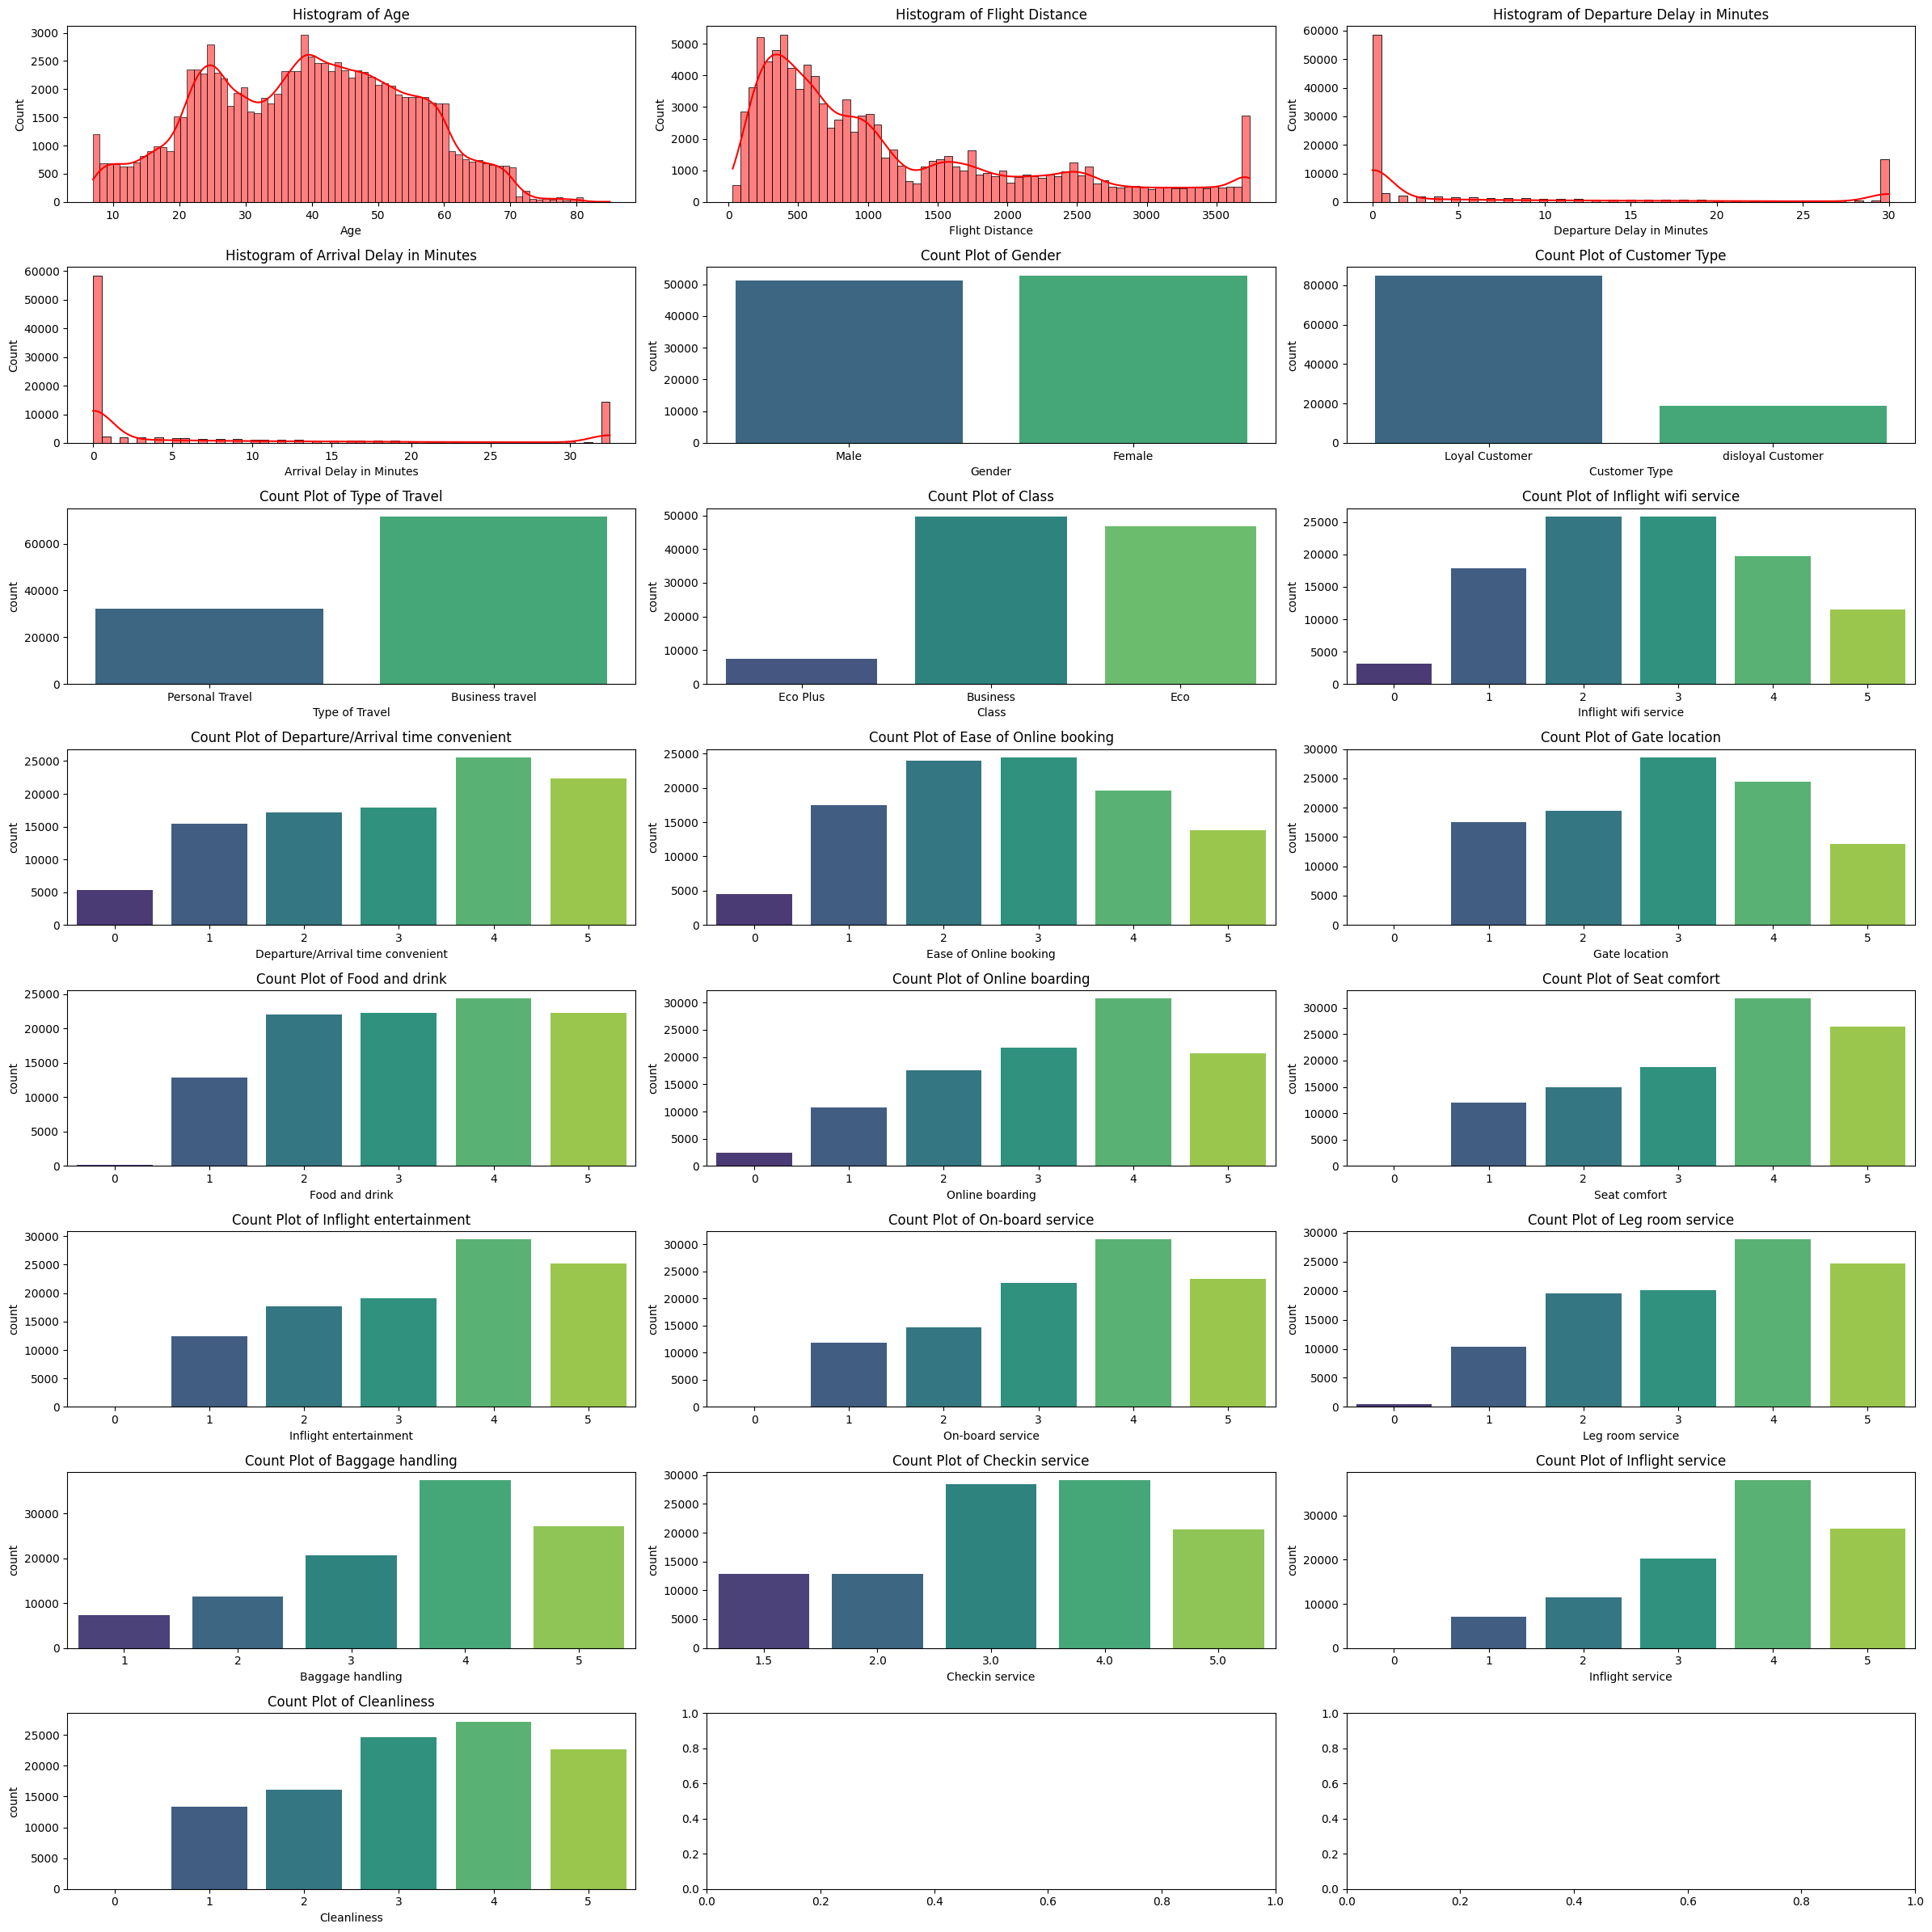

In [36]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(24, 24))
axes = axes.flatten() # visual in 2D

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='red')
    axes[i].set_title(f'Histogram of {col}')

# Plot bar plots for categorical features
for j, col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):
        sns.countplot(x=df[col], ax=axes[i + 1 + j], palette='viridis')
        axes[i + 1 + j].set_title(f'Count Plot of {col}')

plt.tight_layout() # so graph so in a sequence
plt.show()

<div class="alert" style="
    background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
    color: #fff;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    border-radius: 8px;
">
  üåä bivariate EDA
</div>


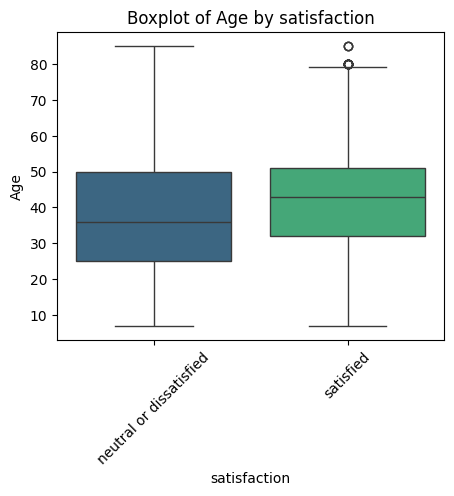

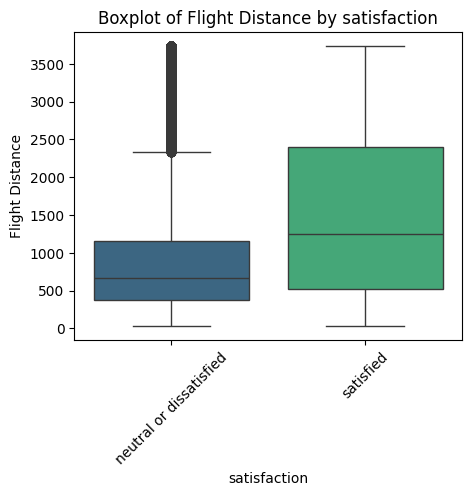

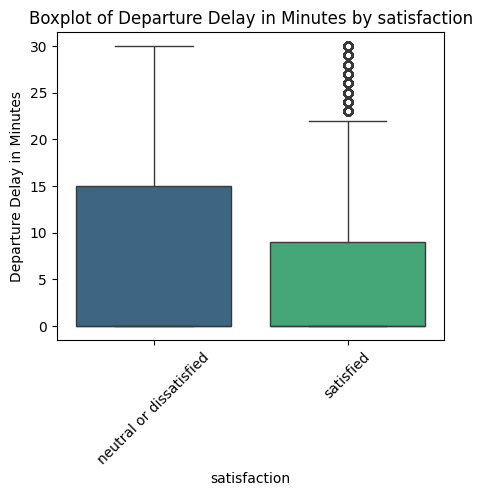

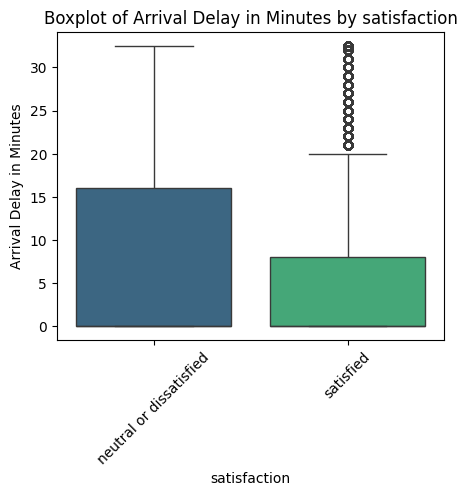

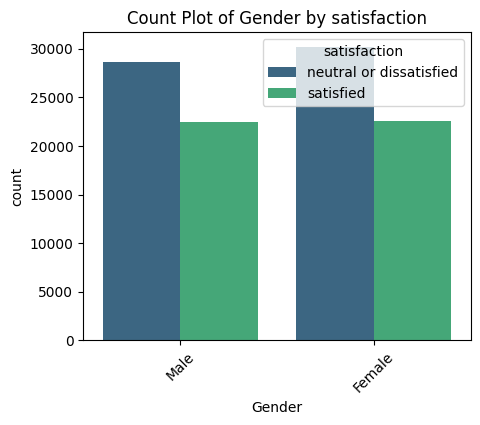

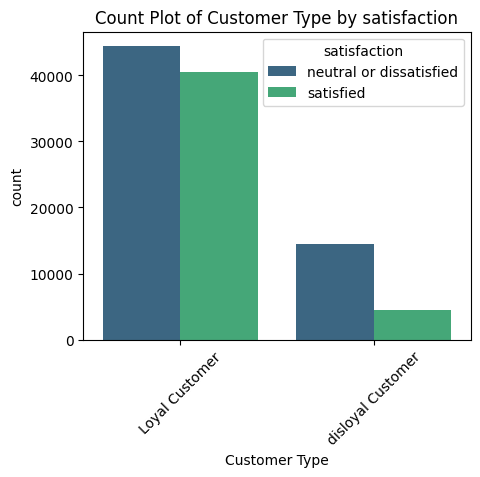

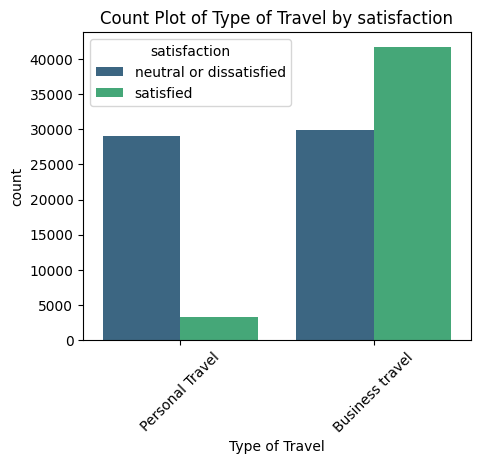

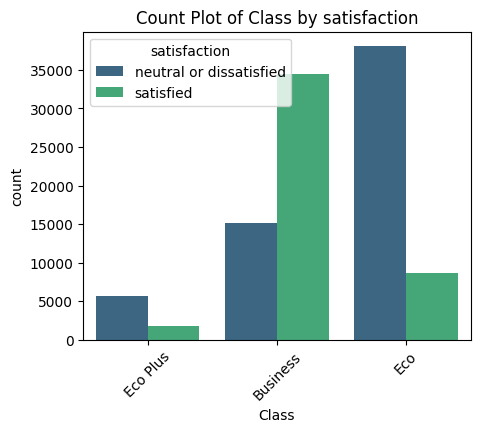

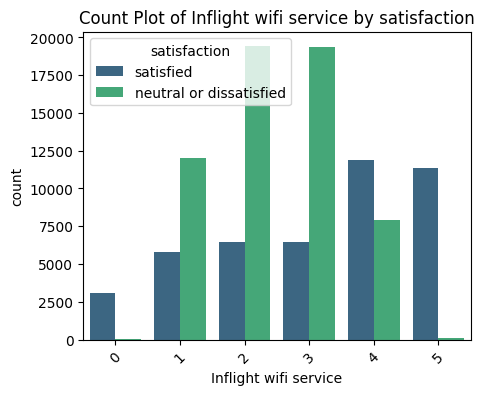

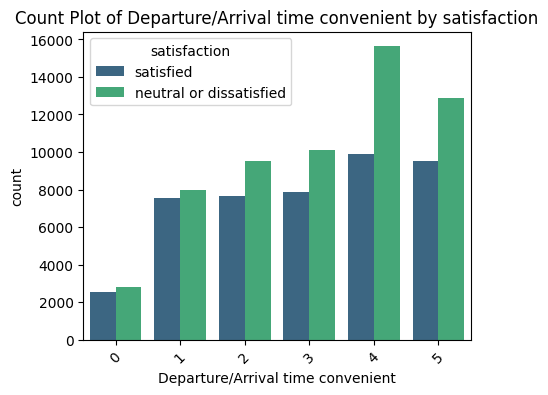

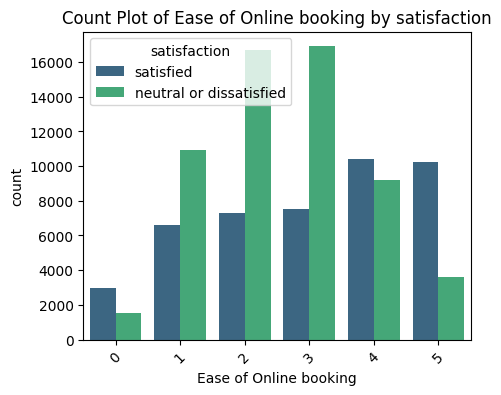

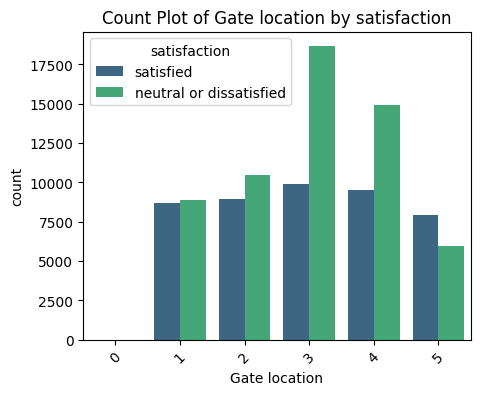

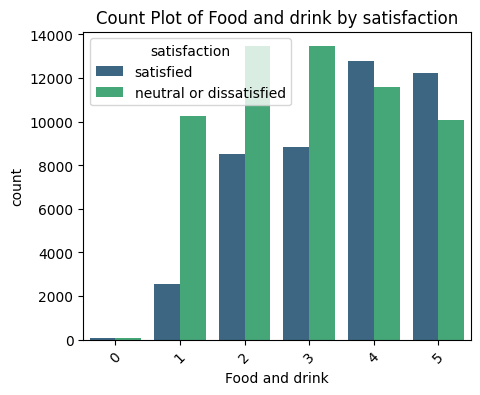

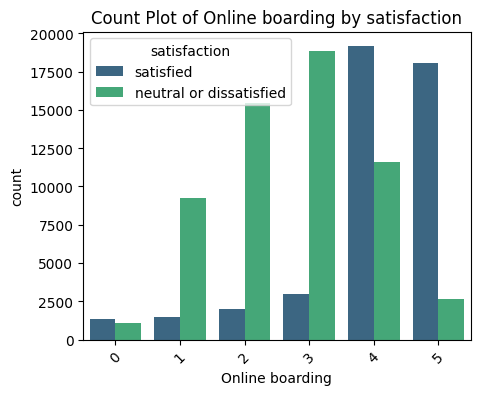

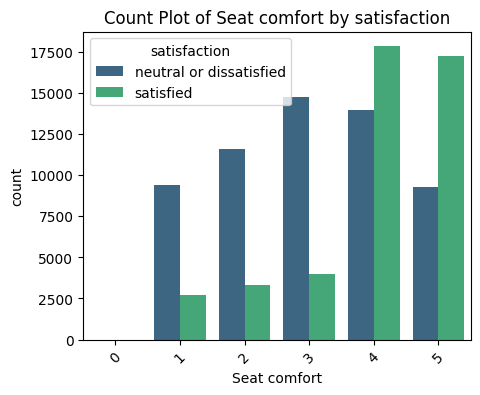

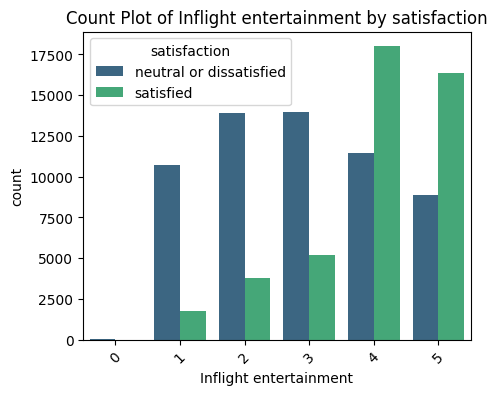

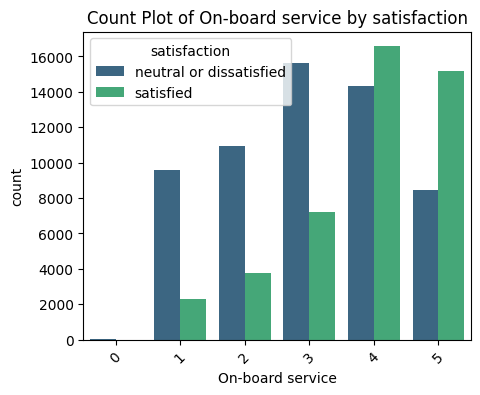

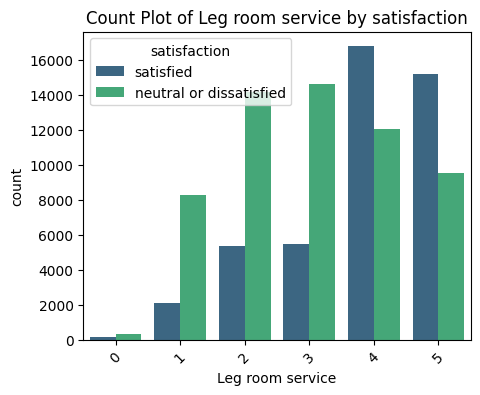

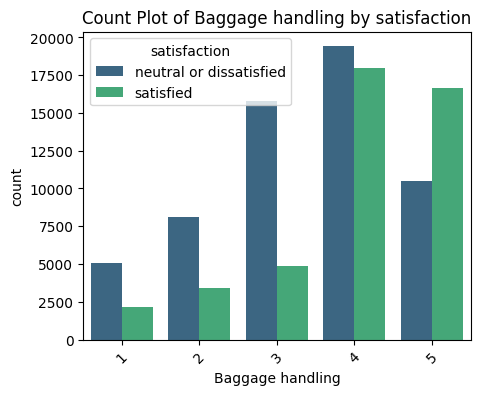

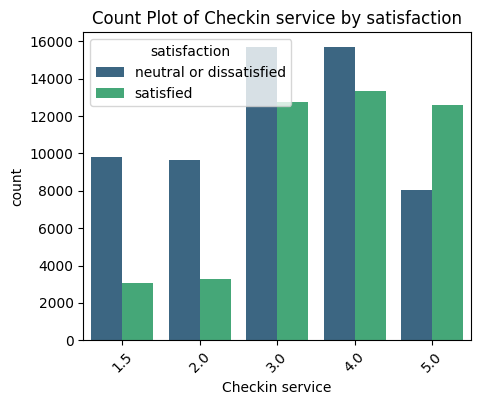

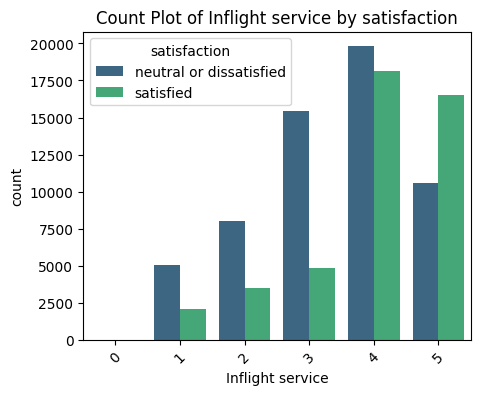

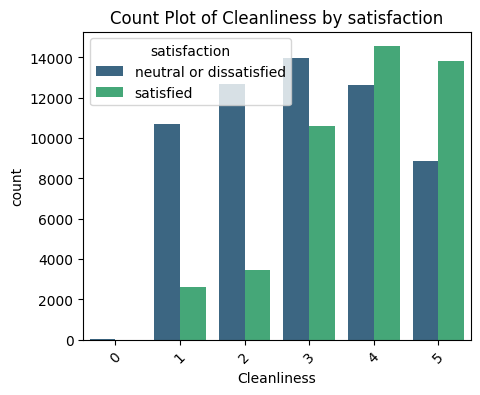

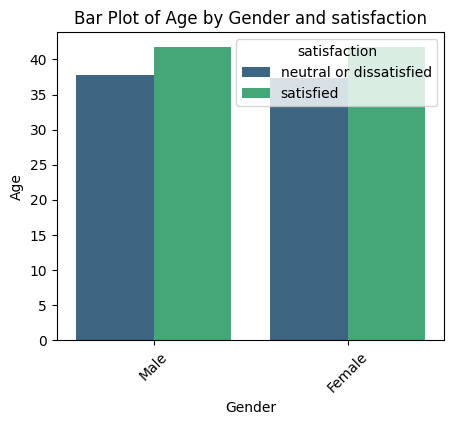

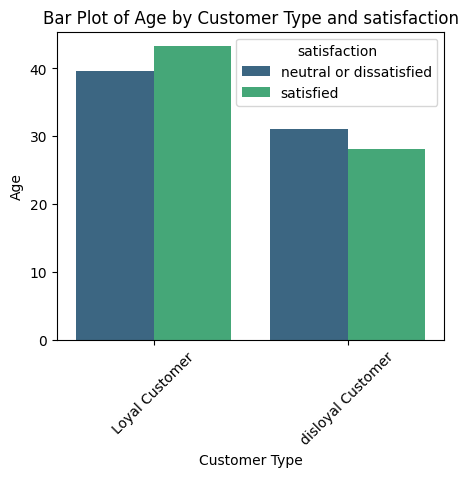

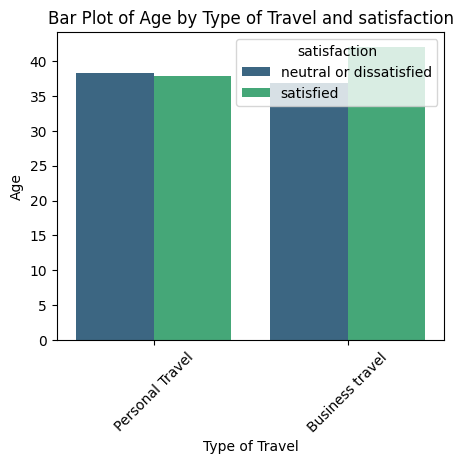

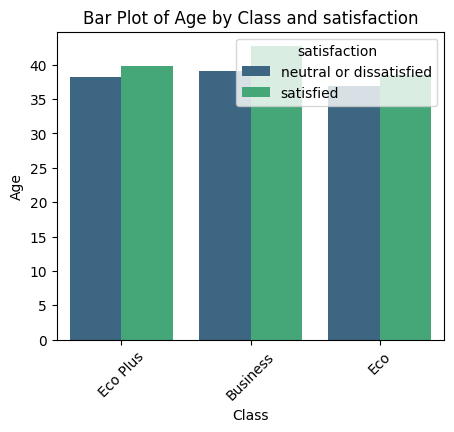

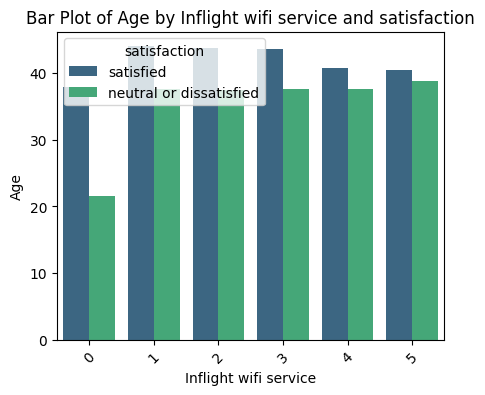

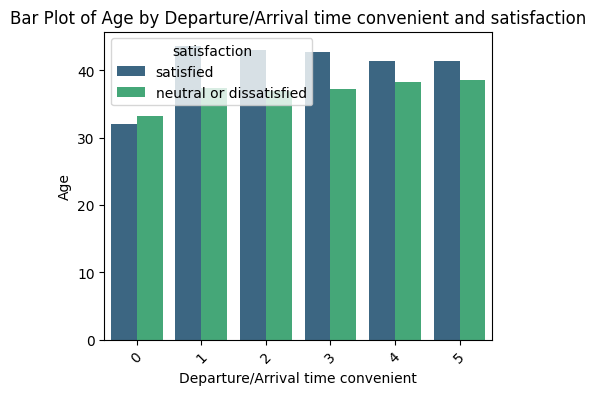

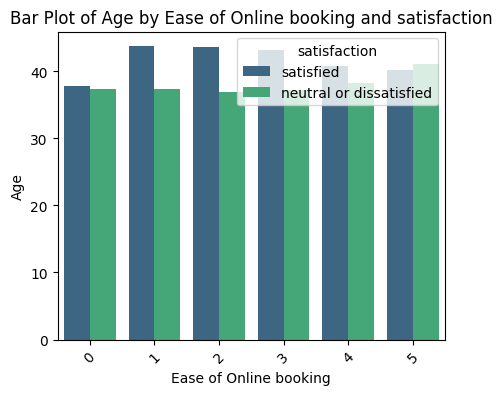

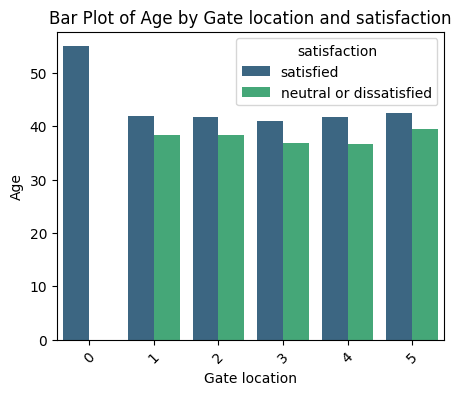

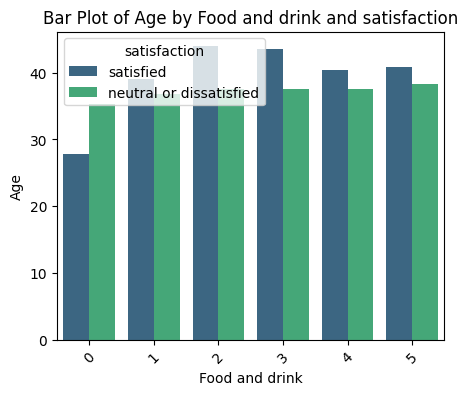

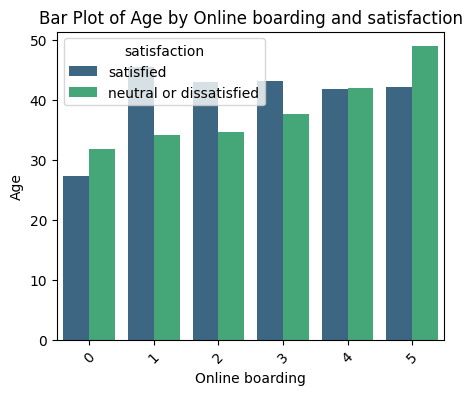

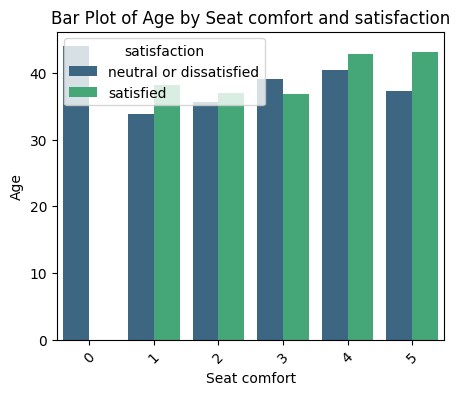

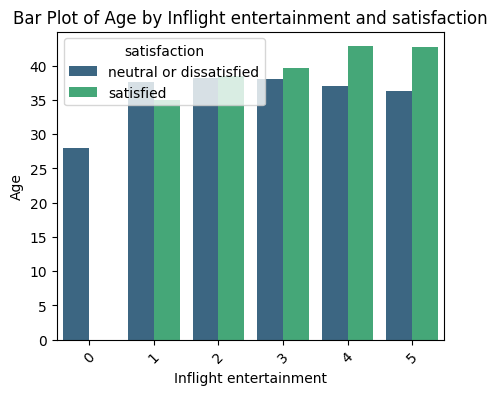

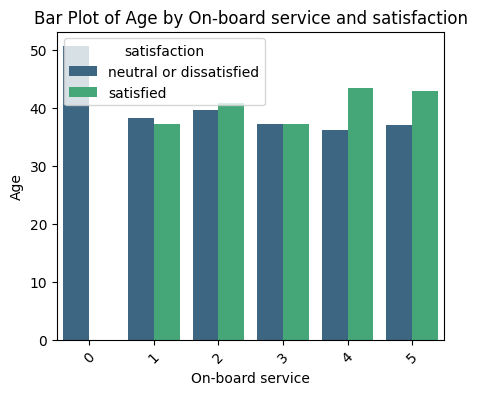

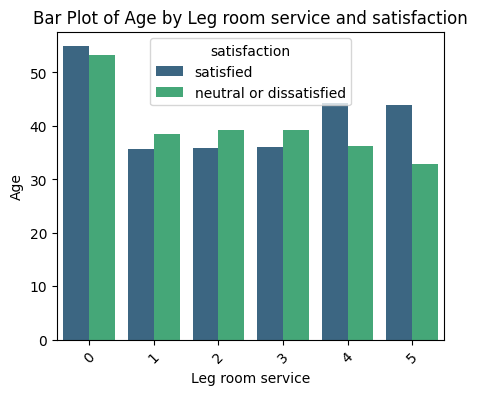

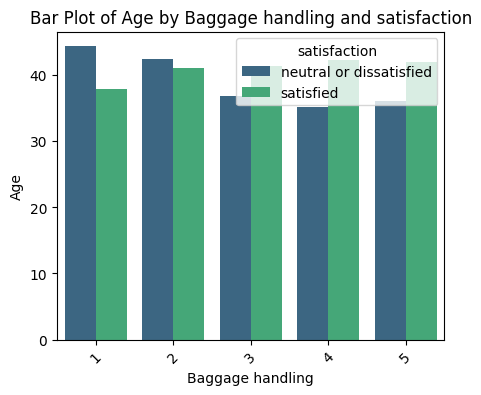

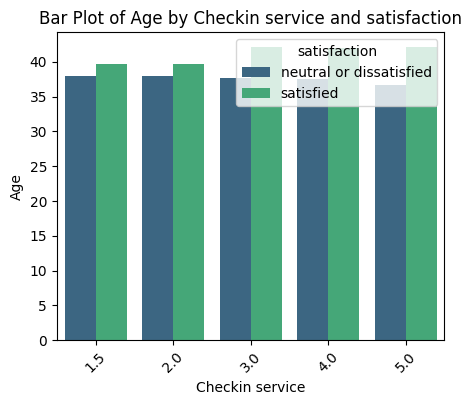

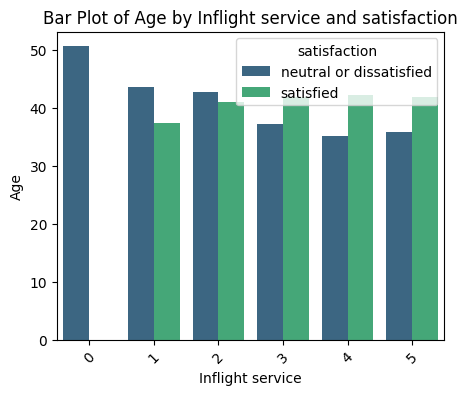

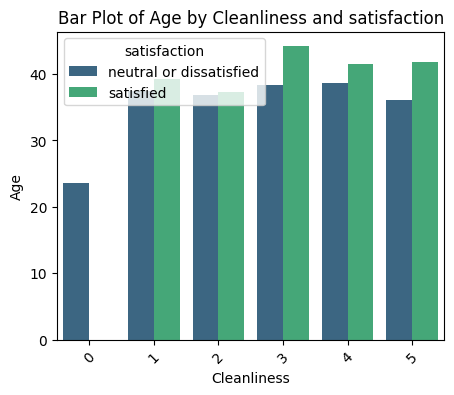

In [37]:
target_column = 'satisfaction'

# Numerical vs. target 
for col in numerical_columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=df[target_column], y=df[col], palette='viridis')
    plt.title(f'Boxplot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs. target 
for col in categorical_columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x=df[col], hue=df[target_column], palette='viridis')
    plt.title(f'Count Plot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()
    
# Categorical vs. Numerical (Bar plots with average values)
for col in categorical_columns:
    plt.figure(figsize=(5, 4))
    sns.barplot(x=df[col], y=df[numerical_columns[0]], hue=df[target_column], palette='viridis', ci=None)
    plt.title(f'Bar Plot of {numerical_columns[0]} by {col} and {target_column}')
    plt.xticks(rotation=45)
    plt.show()

<div class="alert" style="
    background: linear-gradient(135deg, #4facfe 0%, #00f2fe 100%);
    color: #fff;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    border-radius: 8px;
">
  üåä Multivariate EDA
</div>


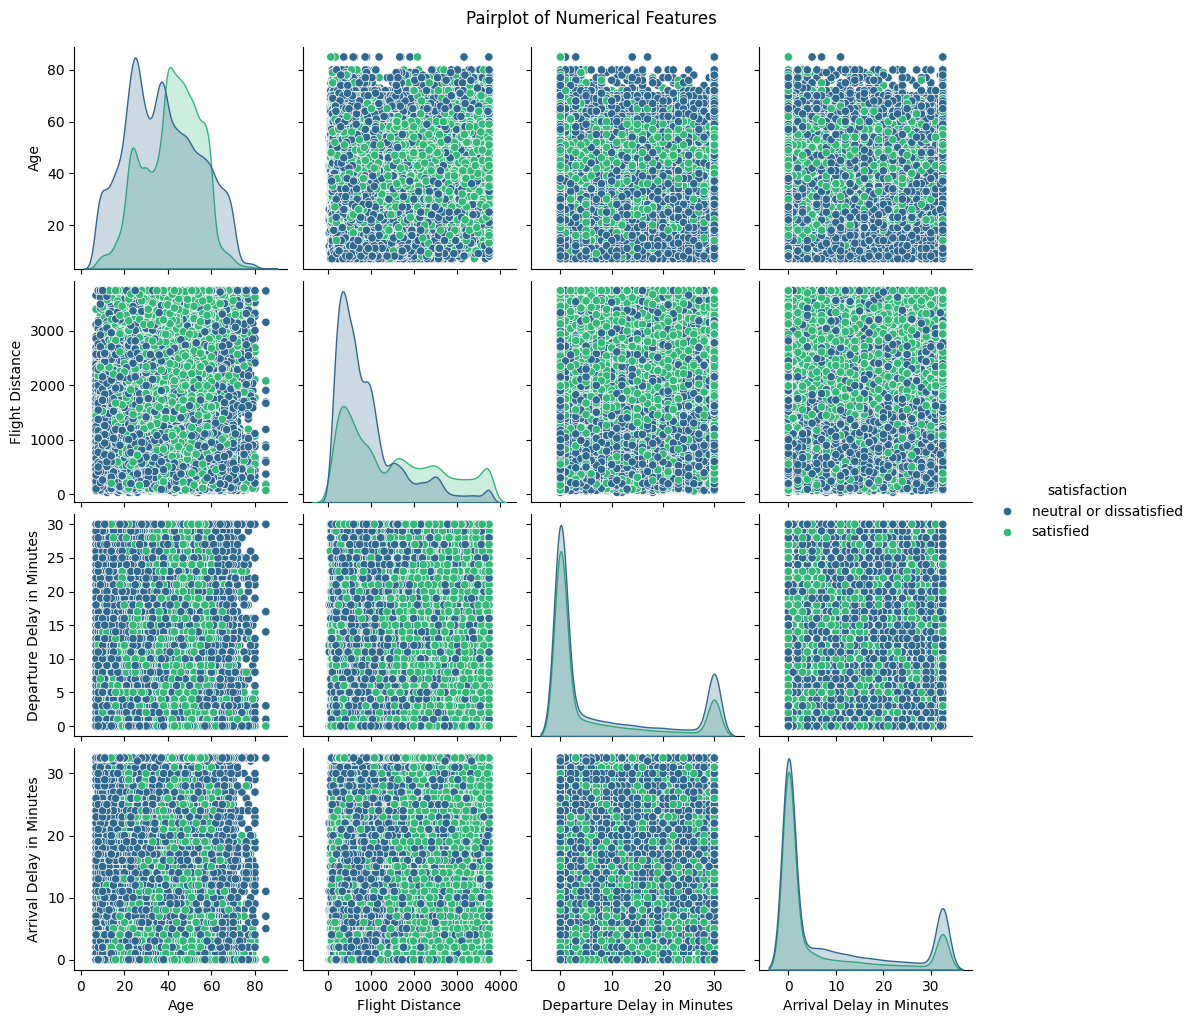

In [38]:
sns.pairplot(df[numerical_columns + [target_column]], hue=target_column, palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

<div class="alert" style="
    background: linear-gradient(135deg, #ff416c 0%, #ff4b2b 100%);
    color: #fff;
    font-weight: bold;
    padding: 12px;
    border-radius: 10px;
">
  üî• ü§® IMPORTANT INSIGHTS
  

* Majority of people who travel are from Age-group 20-40 . This age group is of youngsters like students , working professionals , tourists , businessman, etc.

* Most of people only tavel for upto 1000km distance maybe with in a country or neigbour country . As only tourist people travel for long distances.

* Most of flights are not delayed but if they are delayed they are delayed for more than 30 minutes.Generally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.

* Female travels slightly more than Males.

* Most of flight customers are loyal which means they have taken the flight previously too.

* Most of people travel for buisness purposes.

* Most people travel in Buisness and Eco Class . Eco Plus price is generally between these two classes and just offfers some basic amenties like leg-room , etc which many people dont find valuable enough.

* Flight wifi service is average . They should make it better.

* They should focus on their online booking technolgy as people are facing problem due to this.

* Seat Comfort and Inflight service is also not that good.



</div>



<div class="alert" style="
    background: linear-gradient(135deg, #00c853 0%, #b2ff59 100%);
    color: #fff;
    border: 2px solid #00c853;
    border-radius: 8px;
">
  ‚úÖ 4. FEATURE ENGINEERING
</div>


In [39]:
#Make a new column using Feature Construction ( Domain Knowledge )

df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [40]:
df['Delay Ratio'] = df['Total Delay'] / (df['Flight Distance'] + 1) # +1 because we avoid zero division 

In [41]:
df.head(1)


Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male  Loyal Customer   13  Personal Travel  Eco Plus            460.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4              4.0                 5            5   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   

              satisfaction  Total Delay  Delay Ratio  
0  neutral or dissatisfied         43.0     0.093275

In [42]:
### Convert Age using Binning numerical -> categorical 
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Youngster', 'Adult', 'Senior'])

In [43]:
df.head(1)

Gender   Customer Type  Age   Type of Travel     Class  Flight Distance  \
0   Male  Loyal Customer   13  Personal Travel  Eco Plus            460.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4              4.0                 5            5   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   

              satisfaction  Total Delay  Delay Ratio Age Group  
0  neutral or dissatisfied         43.0     0.093275     Child

In [44]:
df.dtypes

Gender                                 object
Customer Type                          object
Age                                     int64
Type of Travel                         object
Class                                  object
Flight Distance                       float64
Inflight wifi service                   int64
Departure/Arrival time convenient       int64
Ease of Online booking                  int64
Gate location                           int64
Food and drink                          int64
Online boarding                         int64
Seat comfort                            int64
Inflight entertainment                  int64
On-board service                        int64
Leg room service                        int64
Baggage handling                        int64
Checkin service                       float64
Inflight service                        int64
Cleanliness                             int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

<div class="alert" style="background: linear-gradient(to right, #ff7e5f, #feb47b); color: white;">label Encoding</div>


In [45]:
### Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Age Group']

label_mappings = {}

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping for Customer Type: {'Loyal Customer': np.int64(0), 'disloyal Customer': np.int64(1)}
Mapping for Type of Travel: {'Business travel': np.int64(0), 'Personal Travel': np.int64(1)}
Mapping for Class: {'Business': np.int64(0), 'Eco': np.int64(1), 'Eco Plus': np.int64(2)}
Mapping for satisfaction: {'neutral or dissatisfied': np.int64(0), 'satisfied': np.int64(1)}
Mapping for Age Group: {'Adult': np.int64(0), 'Child': np.int64(1), 'Senior': np.int64(2), 'Youngster': np.int64(3)}


In [46]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total Delay', 'Delay Ratio', 'Age Group'],
      dtype='object')

In [47]:
df.head(1)

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2            460.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4              4.0                 5            5   

   Departure Delay in Minutes  Arrival Delay in Minutes  satisfaction  \
0                          25                      18.0             0   

   Total Delay  Delay Ratio  Age Group  
0         43.0     0.093275          1

In [48]:
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [49]:
df.shape

(103904, 26)

<div class="alert" style="
    background: linear-gradient(135deg, #000000 0%,rgb(221, 0, 255) 100%);
    color:rgb(123, 0, 255);
    box-shadow: 0 0 12px rgb(154, 10, 244);
    padding: 12px;
    border-radius: 8px;
">
  üèÜ Feature Selection 
</div>


In [50]:
### Feature Selection

from sklearn.model_selection import train_test_split

X = df.drop(columns='satisfaction')
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
len(X.columns)

25

In [52]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, discrete_features=True)

# Create a DataFrame for mutual information
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

mutual_info_df

Feature  Mutual Information
11                    Online boarding            0.211611
23                        Delay Ratio            0.190751
6               Inflight wifi service            0.161543
4                               Class            0.134969
3                      Type of Travel            0.113675
13             Inflight entertainment            0.092882
5                     Flight Distance            0.084806
12                       Seat comfort            0.078537
15                   Leg room service            0.060404
14                   On-board service            0.057027
8              Ease of Online booking            0.051391
19                        Cleanliness            0.051153
2                                 Age            0.046413
16                   Baggage handling            0.042488
18                   Inflight service            0.040945
17                    Checkin service            0.031965
10                     Food and drink            0.026288
24                          Age Group            0.021806
1                       Customer Type            0.018378
9                       Gate location            0.012565
21           Arrival Delay in Minutes            0.006761
22                        Total Delay            0.005537
20         Departure Delay in Minutes            0.003022
7   Departure/Arrival time convenient            0.002097
0                              Gender            0.000076

In [53]:
#### Create our final dataframe with important features

top_features = mutual_info_df.head(12)['Feature'].tolist()

In [54]:
top_features

['Online boarding',
 'Delay Ratio',
 'Inflight wifi service',
 'Class',
 'Type of Travel',
 'Inflight entertainment',
 'Flight Distance',
 'Seat comfort',
 'Leg room service',
 'On-board service',
 'Ease of Online booking',
 'Cleanliness']

In [55]:
final_df = df[top_features + ['satisfaction']]

In [56]:
final_df.head(3)

Online boarding  Delay Ratio  Inflight wifi service  Class  Type of Travel  \
0                3     0.093275                      3      2               1   
1                3     0.029661                      3      0               0   
2                5     0.000000                      2      0               0   

   Inflight entertainment  Flight Distance  Seat comfort  Leg room service  \
0                       5            460.0             5                 3   
1                       1            235.0             1                 5   
2                       5           1142.0             5                 3   

   On-board service  Ease of Online booking  Cleanliness  satisfaction  
0                 4                       3            5             0  
1                 1                       3            1             0  
2                 4                       2            5             1

In [57]:
final_df.shape

(103904, 13)

In [58]:
# Checking Imbalanced Data
final_df["satisfaction"].value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

<div class="alert" style="
    background: linear-gradient(135deg, #00c853 0%, #b2ff59 100%);
    color: #fff;
    border: 2px solid #00c853;
    border-radius: 8px;
">
   Model Training ‚úÖ 
</div>


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

<div class="alert" style="
    background: linear-gradient(135deg,rgb(200, 123, 0) 0%,rgb(255, 169, 89) 100%);
    color: #fff;
    border: 2px solidrgb(255, 126, 28);
    border-radius: 8px;
">
   we take only 5% data for testing , its give us idea which model maybe performe better so we again hypertunning them.
</div>


In [70]:
# Sample 5% of the data
df_sample = final_df.sample(frac=0.05, random_state=42)

In [71]:
# Prepare the sample data
X_sample = final_df.drop(columns='satisfaction')
y_sample = final_df['satisfaction']


# Split the sampled data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [72]:

# Initialize all classifiers model
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
}



In [73]:
# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample, y_pred)
    results[name] = accuracy

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


In [74]:
# Print results
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

Logistic Regression: 0.8309
Random Forest: 0.9424
Gradient Boosting: 0.9213
AdaBoost: 0.8962
Support Vector Classifier: 0.6652
K-Nearest Neighbors: 0.8616
Naive Bayes: 0.8528
Decision Tree: 0.9221
LightGBM: 0.9438
XGBoost: 0.9442


<div class="alert" style="
    background: linear-gradient(135deg, #00c853 0%, #b2ff59 100%);
    color: #fff;
    border: 2px solid #00c853;
    border-radius: 8px;
">
  we selected LGBM becaused its best ‚úÖ .
</div>


<div class="alert" style="
    background-color: #fce4ec;
    color: #d81b60;
    font-weight: bold;
    padding: 10px;
    border: 1px solid #d81b60;
    border-radius: 6px;
">
  üíñ Making LGBM MODEL
</div>


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

In [61]:
X = final_df.drop(columns='satisfaction')
y = final_df['satisfaction']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [64]:
y_pred = lgbm_model.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for binary-class
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')  

In [66]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9438
Precision: 0.9441
Recall: 0.9438
F1 Score: 0.9437


<div class="alert" style="
    background: linear-gradient(135deg, #ff416c 0%, #ff4b2b 100%);
    color: #fff;
    font-weight: bold;
    padding: 12px;
    border-radius: 10px;
">
  üî• Alert , We dont do hyperparamter tuning as there was a risk of overfitting as model is already performing quite good!
</div>



<div class="alert" style="
    background: linear-gradient(135deg, #1f1f1f 0%, #3f3f3f 100%);
    color:rgb(68, 237, 6);
    box-shadow: 0 4px 10px rgba(0,0,0,0.5);
    padding: 12px;
    border-radius: 8px;
">
  üñ§ 6. MODEL SAVING!
</div>


In [67]:
import pickle

with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model, file)


<div class="alert" style="
    background: linear-gradient(135deg, #000000 0%,rgb(221, 0, 255) 100%);
    color:rgb(252, 252, 252);
    box-shadow: 0 0 12px rgb(154, 10, 244);
    padding: 12px;
    border-radius: 8px;
">
  üèÜ7. MODEL LOADING AND TESTING!
</div>


In [68]:
with open('lgbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [69]:
X_train[8:15]

Online boarding  Delay Ratio  Inflight wifi service  Class  \
84550                5     0.000000                      4      0   
17315                2     0.000000                      2      1   
2686                 5     0.000585                      3      0   
95365                1     0.178571                      1      1   
12065                1     0.018987                      1      1   
48204                4     0.004904                      2      0   
11348                4     0.000000                      4      1   

       Type of Travel  Inflight entertainment  Flight Distance  Seat comfort  \
84550               0                       2           3736.5             5   
17315               1                       3            986.0             3   
2686                0                       4           1709.0             4   
95365               1                       5            349.0             5   
12065               1                       5            631.0             5   
48204               0                       4           2038.0             5   
11348               0                       4            370.0             4   

       Leg room service  On-board service  Ease of Online booking  Cleanliness  
84550                 2                 2                       4            3  
17315                 4                 4                       2            3  
2686                  4                 4                       3            3  
95365                 2                 3                       1            5  
12065                 3                 4                       1            5  
48204                 4                 4                       2            3  
11348                 5                 5                       4            4

In [70]:
y_train[8:15]

84550    1
17315    0
2686     1
95365    0
12065    0
48204    1
11348    1
Name: satisfaction, dtype: int64

In [71]:
X_new = np.array([
    [5 , 0.000000 ,4 ,0, 0,	2 ,3736.5, 5, 2, 2,	4,	3],
    [2	, 0.000000 , 	2 , 1	, 1 ,3	,986.0 ,	3 ,	4 ,	4	, 2	, 3]
])

In [72]:
y_pred_new = loaded_model.predict(X_new)

In [73]:

print("Predictions:", y_pred_new)


Predictions: [1 0]


<div class="alert alert-success alert-dismissible fade show" style="
    background-color: #28a745;
    color: #fff;
">
  ‚úÖ It is doing pretty good predictions
  <button type="button" class="open" data-dismiss="right">&times;</button>
</div>
